# K-means

### librerias

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### CARGAR LOS DATOS ####
vino = pd.read_csv("wine.csv")

vino

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


El dataframe corresponde a distinto tipos de vinos, con sus datos correspondientes como: grado alcoholico, cantidad de ceniza, varios compuestos del vino, el segmento de clientes, etc. Y en total son 178 datos

In [101]:
vino.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

Se revisa si posee nulos, para no afectar el trabajo del dataframe

In [102]:
vino.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

Se ve el tipo de dato. Datos enteros y datos flotantes

In [103]:
vino_sin_customer=vino.drop(['Customer_Segment'], axis=1)

Se elimina la columna del segmento de cliente, ya que no afecta la clasificacion de vinos

In [114]:
vino_sin_customer.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.971910
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.805558
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


se normalizara los datos para su mejor manejo

In [115]:
vino_norm = (vino_sin_customer-vino_sin_customer.min())/(vino_sin_customer.max()-vino_sin_customer.min())
vino_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.485955
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.402779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
vino_norm.var()

Alcohol                 0.045641
Malic_Acid              0.048744
Ash                     0.021523
Ash_Alcanity            0.029633
Magnesium               0.024101
Total_Phenols           0.046574
Flavanoids              0.044407
Nonflavanoid_Phenols    0.055139
Proanthocyanins         0.032600
Color_Intensity         0.039127
Hue                     0.034533
OD280                   0.067636
Proline                 0.050451
K_means                 0.162231
dtype: float64

Al normalizar los datos estos se mueven entre 0 y 1. De tal manera que nuestros graficos no presenten tanta distorsion

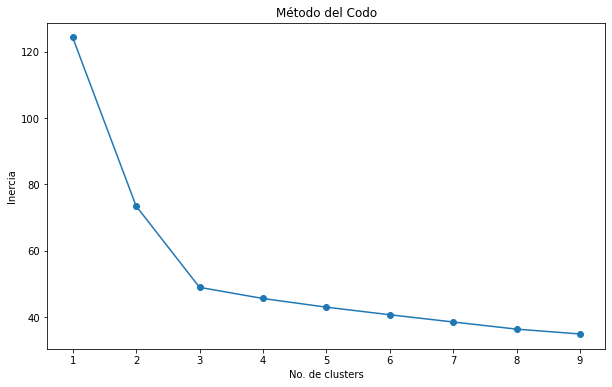

In [116]:
inercia = [] 
for i in range(1, 10):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(vino_norm)
    inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 10)), inercia, marker='o')
plt.show()

Se realiza el metodo del codo para ver la cantidad de clusters. en este caso son 3 cluster

In [117]:
algoritmo = KMeans(n_clusters = 3, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

algoritmo.fit(vino_norm)

KMeans(n_clusters=3)

Se aplica el clustering y se entrena al modelo

In [118]:
vino_sin_customer['K_means'] = algoritmo.labels_

Se obtiene la etiqueta de nuestra prediccion y se agrega al dataframe

In [119]:
vino_sin_customer.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


Se muestra el dataset con los clusters a los que pertenece cada vino

In [120]:
modelo_pca = PCA(n_components = 2)
pca_vino = modelo_pca.fit_transform(vino_norm)
pca_vino_df = pd.DataFrame(data = pca_vino, columns =['componente_1', 'componente_2'])
pca_nombre_vino = pd.concat([pca_vino_df, vino_sin_customer[['K_means']]], axis=1)

pca_nombre_vino

,componente_1,componente_2,K_means
0,-0.858423,-0.237229,0
1,-0.686208,-0.002472,0
2,-0.715179,-0.180987,0
3,-0.946712,-0.558833,0
4,-0.473046,-0.065604,0
...,...,...,...
173,0.884350,-0.489048,1
174,0.771615,-0.357764,1
175,0.805068,-0.557349,1
176,0.765316,-0.434137,1


Se genera la tabla que relaciona 2 componenetes y los agrupa en los 3 clusters generado

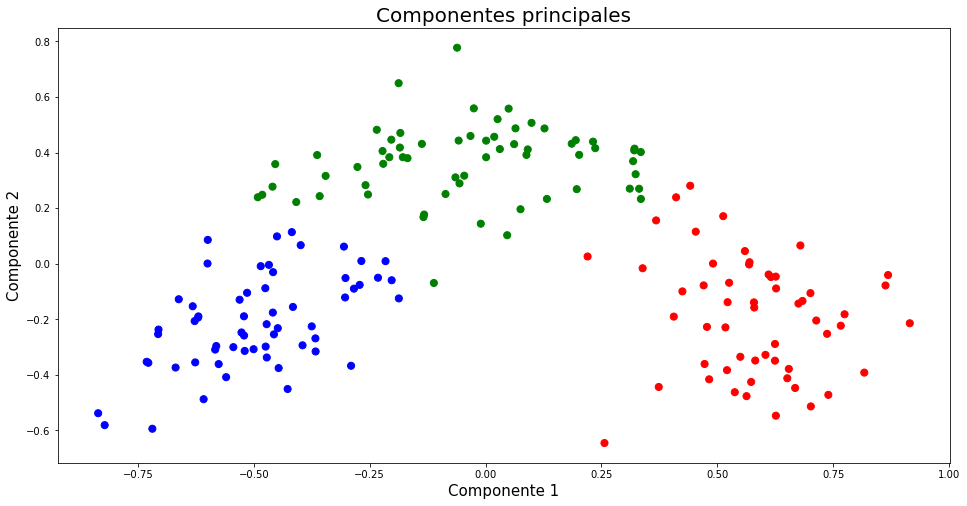

In [113]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize =15)
ax.set_ylabel('Componente 2', fontsize =15)
ax.set_title('Componentes principales', fontsize =20)
colors = np.array(["blue", "green", "red"])
ax.scatter(x = pca_nombre_vino.componente_1, y = pca_nombre_vino.componente_2, c = colors[pca_nombre_vino.K_means], s=50)

plt.show()

Grafico de los 3 clusters generados bajo este modelo

La particion de los 3 clusters se debe a que existe un grupo que posee niveles bajo 0 del componente 2 y bajos a -0,2 del componente 1. Mientras que la particion de otro grupo se da por niveles del componente 2 sobre el 0 y componentes 1 entre -0,5 y 0,3. Y el ultimo cluster se mueve con componentes del 2 entre -0,6 y 0,2, y componentes 1 sobre los 0,25

Estos componentes son extraidos del algoritmo PCA el cual, a traves de metodos cuadrados, trabaja de mejor manera datos de multiples dimensiones, en este caso son 13. Por lo tanto estos componentes son combinaciones generadas por el algoritmo entre las dimensiones del dataset